# Import Libraries

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
sns.set_theme(style="whitegrid", palette='Set2')

# Import Data

In [7]:
df = pd.read_csv('../../data/02-model-data/data_cleaned.csv')

In [ ]:
driver_df = pd.read_csv('../../data/00-raw-data/drivers.csv')
df = pd.merge(df, driver_df[['driverId', 'driverRef']], on='driverId', how='left')
driver_df.rename(columns={'driverId':'pole_driverId'}, inplace=True)
df = pd.merge(df, driver_df[['pole_driverId', 'driverRef']], on='pole_driverId', how='left')
driver_df.rename(columns={'pole_driverId':'win_driverId'}, inplace=True)
df = pd.merge(df, driver_df[['win_driverId', 'driverRef']], on='win_driverId', how='left')
df.rename(columns={'driverRef_x':'driverRef', 'driverRef_y':'pole_driverRef', 'driverRef':'win_driverRef'}, inplace=True)
df.head()

In [97]:
df.head()

,season,round,season_round,driverId,raceId,circuitId,position,points,grid,laps,...,cumulative_points,cumulative_laps,pole_driverId,pole_history,win_driverId,win_history,label,driverRef,pole_driverRef,win_driverRef
0,1950,1,1950_1,642,833,9,1,9.0,1,70,...,9.0,70,642,1,642,1,Podium,farina,farina,farina
1,1950,1,1950_1,786,833,9,2,6.0,2,70,...,6.0,70,642,0,642,0,Podium,fagioli,farina,farina
2,1950,1,1950_1,686,833,9,3,4.0,4,70,...,4.0,70,642,0,642,0,Podium,reg_parnell,farina,farina
3,1950,1,1950_1,704,833,9,4,3.0,6,68,...,3.0,68,642,0,642,0,Top_10,cabantous,farina,farina
4,1950,1,1950_1,627,833,9,5,2.0,9,68,...,2.0,68,642,0,642,0,Top_10,rosier,farina,farina


In [98]:
df.columns

Index(['season', 'round', 'season_round', 'driverId', 'raceId', 'circuitId',
       'position', 'points', 'grid', 'laps', 'status', 'constructorRef',
       'weather', 'stop', 'age_on_race', 'cumulative_points',
       'cumulative_laps', 'pole_driverId', 'pole_history', 'win_driverId',
       'win_history', 'label', 'driverRef', 'pole_driverRef', 'win_driverRef'],
      dtype='object')

In [186]:
all_sentiment_df = pd.read_csv('../../data/01-modified-data/all_teams_sentiment_df.csv')

In [187]:
grouped_df = all_sentiment_df.groupby(['Team', 'sentiment'], as_index = False)['0'].count() # Group by team and sentiment

# Data Visualization

- In our increasingly data-driven world, it’s more important than ever to have accessible ways to view and understand data. After all, the demand for data skills in employees is steadily increasing each year. Employees and business owners at every level need to have an understanding of data and of its impact.
- That’s where data visualization comes in handy. With the goal of making data more accessible and understandable, data visualization in the form of dashboards is the go-to tool for many businesses to analyze and share information. 
- Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data. Additionally, it provides an excellent way for employees or business owners to present data to non-technical audiences without confusion.
- In the world of Big Data, data visualization tools and technologies are essential to analyze massive amounts of information and make data-driven decisions.
- ​​​​Something as simple as presenting data in graphic format may seem to have no downsides. But sometimes data can be misrepresented or misinterpreted when placed in the wrong style of data visualization. When choosing to create a data visualization, it’s best to keep both the advantages and disadvantages in mind. 
- `Why data visualization is important?`
    - The importance of data visualization is simple: it helps people see, interact with, and better understand data. Whether simple or complex, the right visualization can bring everyone on the same page, regardless of their level of expertise.
    - It’s hard to think of a professional industry that doesn’t benefit from making data more understandable. Every STEM field benefits from understanding data—and so do fields in government, finance, marketing, history, consumer goods, service industries, education, sports, and so on. 
    - While we’ll always wax poetically about data visualization (you’re on the Tableau website, after all) there are practical, real-life applications that are undeniable. And, since visualization is so prolific, it’s also one of the most useful professional skills to develop. The better you can convey your points visually, whether in a dashboard or a slide deck, the better you can leverage that information. The concept of the citizen data scientist is on the rise. Skill sets are changing to accommodate a data-driven world. It is increasingly valuable for professionals to be able to use data to make decisions and use visuals to tell stories of when data informs the who, what, when, where, and how. 
    - While traditional education typically draws a distinct line between creative storytelling and technical analysis, the modern professional world also values those who can cross between the two: data visualization sits right in the middle of analysis and visual storytelling.
- `General Types of Visualizations:`
    - Chart: Information presented in a tabular, graphical form with data displayed along two axes. Can be in the form of a graph, diagram, or map. Learn more.
    - Table: A set of figures displayed in rows and columns. Learn more.
    - Graph: A diagram of points, lines, segments, curves, or areas that represents certain variables in comparison to each other, usually along two axes at a right angle. 
    - Geospatial: A visualization that shows data in map form using different shapes and colors to show the relationship between pieces of data and specific locations. Learn more. 
    - Infographic: A combination of visuals and words that represent data. Usually uses charts or diagrams.
    - Dashboards: A collection of visualizations and data displayed in one place to help with analyzing and presenting data. Learn more.
- `Advantages:`
    - Our eyes are drawn to colors and patterns. We can quickly identify red from blue, and squares from circles. Our culture is visual, including everything from art and advertisements to TV and movies. Data visualization is another form of visual art that grabs our interest and keeps our eyes on the message. When we see a chart, we quickly see trends and outliers. If we can see something, we internalize it quickly. It’s storytelling with a purpose. If you’ve ever stared at a massive spreadsheet of data and couldn’t see a trend, you know how much more effective a visualization can be.
    - Easily sharing information.
    - Interactively explore opportunities.
    - Visualize patterns and relationships.
- `Disadvantages:`
    - While there are many advantages, some of the disadvantages may seem less obvious. For example, when viewing a visualization with many different datapoints, it’s easy to make an inaccurate assumption. Or sometimes the visualization is just designed wrong so that it’s biased or confusing.
    - Biased or inaccurate information.
    - Correlation doesn’t always mean causation.
    - Core messages can get lost in translation.

## Record Data

### Visualizing Drivers with most wins and points

In [99]:
win_count_df = df[df['position'] == 1.0].groupby('driverRef', as_index=False)['position'].count()
win_count_df.sort_values(by = 'position', axis=0, ascending=False, inplace=True)
win_count_df_top10 = win_count_df.head(10)

max_points_df = df.groupby('driverRef', as_index=False)['points'].sum()
max_points_df.sort_values(by = 'points', axis=0, ascending=False, inplace=True)
max_points_df_top10 = max_points_df.head(10)

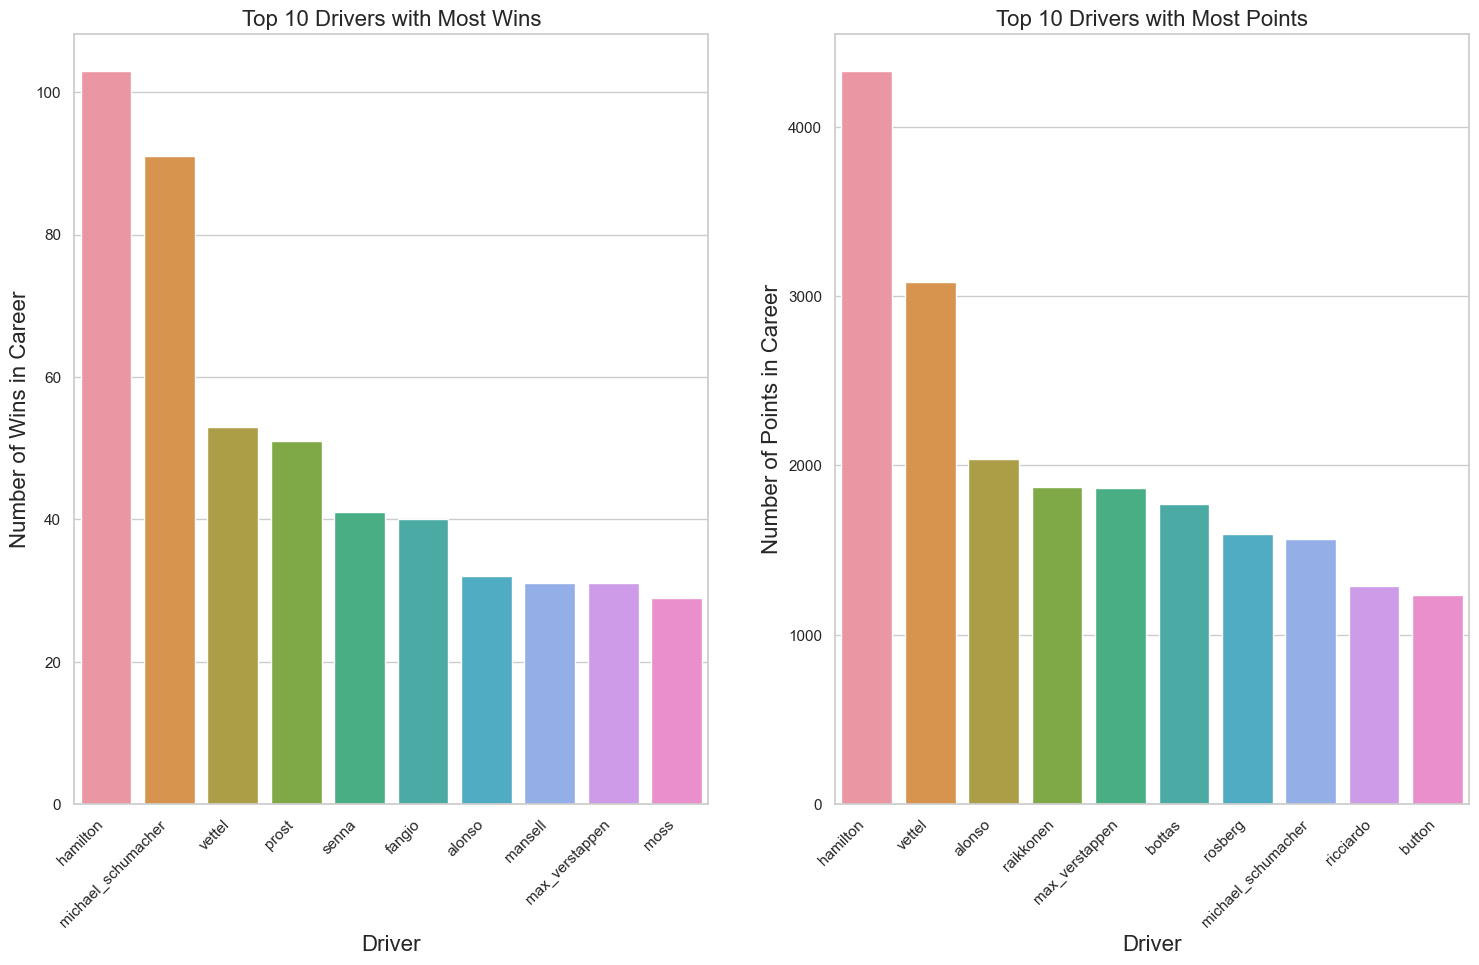

In [184]:
fig, ax = plt.subplots(nrows=1, ncols=2 ,figsize = (18, 10))

sns.barplot(x = win_count_df_top10['driverRef'], y = win_count_df_top10['position'] , ax = ax[0])
sns.barplot(x = max_points_df_top10['driverRef'], y = max_points_df_top10['points'], ax = ax[1])

FS = 16

ax[1].set_xlabel('Driver', fontsize=FS)
ax[1].set_ylabel('Number of Points in Career', fontsize=FS)
ax[1].set_title('Top 10 Drivers with Most Points', fontsize=FS)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, horizontalalignment='right')

ax[0].set_xlabel('Driver', fontsize=FS)
ax[0].set_ylabel('Number of Wins in Career', fontsize=FS)
ax[0].set_title('Top 10 Drivers with Most Wins', fontsize=FS)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment='right')

plt.savefig('../../501-project-website/images/visualizations/main_data/top10_drivers_wins_points.png')
plt.show()

While Michael Schumacher has the more wins in his entire career than other drivers except Lewis Hamilton, he has lesser number of points as compared to them. By domain knowledge we also know that Schumacher was a part of F1 from the early 90s to 2004, which leads us to the conclusion the point distribution for getting wins has increased over the years. This strange behaviour may also mean that other drivers apart of Schumacher gained more points while not winning (positions 2-10 also has points).

### Visualizing Constructors (Team) with most wins and points

In [102]:
c_win_count_df = df[df['position'] == 1.0].groupby('constructorRef', as_index=False)['position'].count()
c_win_count_df.sort_values(by = 'position', axis=0, ascending=False, inplace=True)
c_win_count_df_top10 = c_win_count_df.head(10)

c_max_points_df = df.groupby('constructorRef', as_index=False)['points'].sum()
c_max_points_df.sort_values(by = 'points', axis=0, ascending=False, inplace=True)
c_max_points_df_top10 = c_max_points_df.head(10)

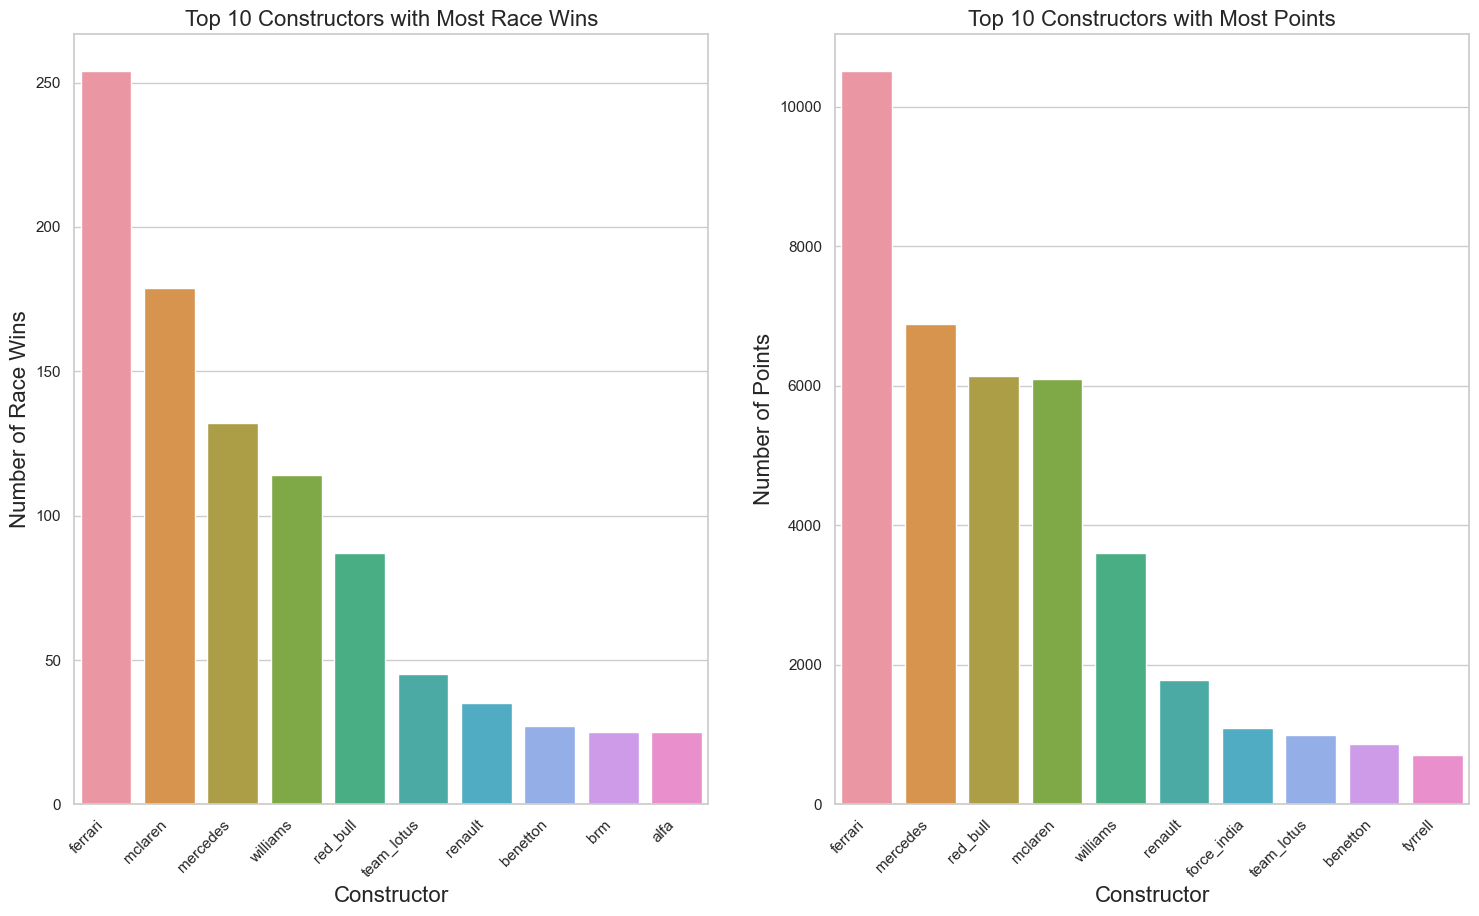

In [185]:
fig, ax = plt.subplots(nrows=1, ncols=2 ,figsize = (18, 10))

sns.barplot(x = c_win_count_df_top10['constructorRef'], y = c_win_count_df_top10['position'], ax=ax[0])
sns.barplot(x = c_max_points_df_top10['constructorRef'], y = c_max_points_df_top10['points'], ax=ax[1])

FS = 16
ax[1].set_xlabel('Constructor', fontsize=FS)
ax[1].set_ylabel('Number of Points', fontsize=FS)
ax[1].set_title('Top 10 Constructors with Most Points', fontsize=FS)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, horizontalalignment='right')

ax[0].set_xlabel('Constructor', fontsize=FS)
ax[0].set_ylabel('Number of Race Wins', fontsize=FS)
ax[0].set_title('Top 10 Constructors with Most Race Wins', fontsize=FS)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment='right')

plt.savefig('../../501-project-website/images/visualizations/main_data/top10_constructor_wins_points.png')
plt.show()

A team like McLaren has been in F1 since a very early time which justifies it being the second team while seeing race wins. But the points gathered for McLaren have been lesser in the past few years compared to before 2000. Since we already know the point distribution from being 1st in the race was less before 2000 and McLaren is now a mid-tier team it makes sense that it has less overall points despite being second in Race wins.

### Comparison of most famous and successful drivers

#### Sebastian Vettel, Lewis Hamilton and Fernando Alonso
These 3 drivers are also called the big 3 of the newer generation. All of them are from rival teams and are rivals on track too. They went head-to-head in a lot of battles on track which makes me want to compare their points , win histories and laps races over the past seasons.

In [60]:
df1 = df[(df['driverRef'] == 'vettel') | (df['driverRef'] == 'hamilton') | (df['driverRef'] == 'alonso')]
df2 = df1[['season', 'round', 'driverRef', 'cumulative_points']]
df3 = df1[['season', 'round', 'driverRef', 'win_history']]
df4 = df1[['season', 'round', 'driverRef', 'cumulative_laps']]
df5 = df1.groupby(['season', 'driverRef'], as_index=False)['points'].sum()

Text(0.5, 0.98, 'Comparison of Vettel, Alonso and Hamilton Seasonwise')

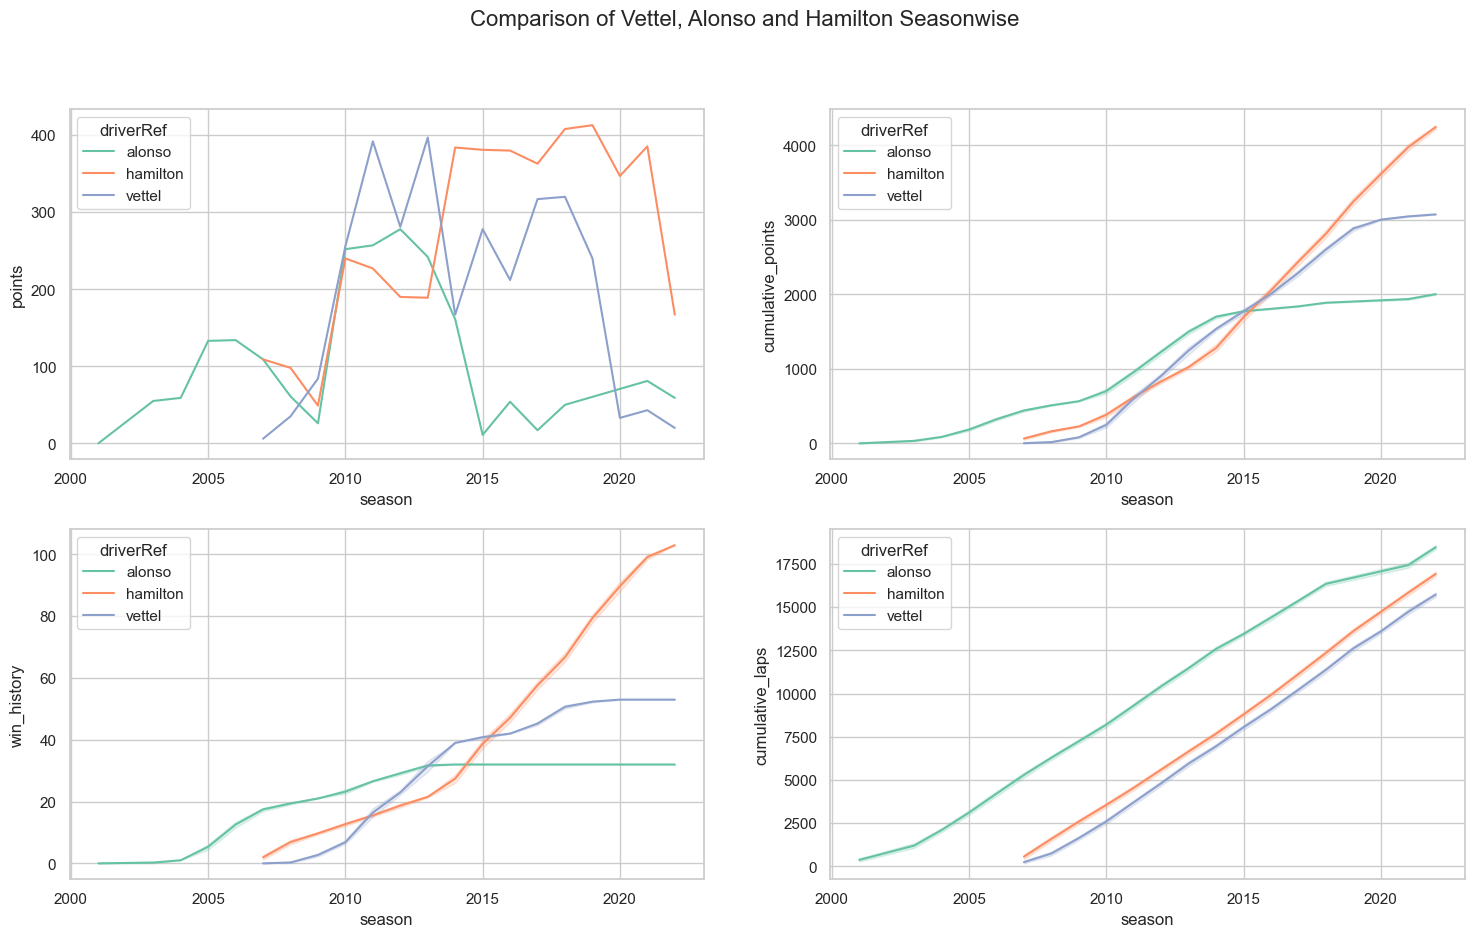

In [93]:
fig, ax = plt.subplots(nrows=2, ncols=2 ,figsize = (18, 10))
sns.lineplot(x = 'season', y = 'points', hue = 'driverRef', data = df5, ax=ax[0,0])
sns.lineplot(x = 'season', y = 'cumulative_points', hue = 'driverRef', data = df2, ax=ax[0,1])
sns.lineplot(x = 'season', y = 'win_history', hue = 'driverRef', data = df3, ax=ax[1,0])
sns.lineplot(x = 'season', y = 'cumulative_laps', hue = 'driverRef', data = df4, ax=ax[1,1])
plt.suptitle('Comparison of Vettel, Alonso and Hamilton Seasonwise', fontsize=16)

The number of points gained in each season for Alonso and Vettel peaked during 2011-2014 seasons while Hamilton peaked during 2017-2020. The downfall of Alonso resulted in the success of Hamiltion who became more succesful after 2013. 

#### Lewis Hamilton and Max Verstappen for the 2021 Season
The 2021 season went down to the last race and resulted in a very close finish for World Driver's Championship between Lewish Hamilton (2nd) and Max Verstappen (1st). The following section compares the points, laps completed and grid positions for all the races in the 2021 season.

In [88]:
df6 = df[(df['driverRef'] == 'max_verstappen') | (df['driverRef'] == 'hamilton')]
df6 = df6[df6['season'] == 2021]
df7 = df6[['round', 'driverRef', 'position']]
df8 = df6[['round', 'driverRef', 'points']]
df9 = df6[['round', 'driverRef', 'laps']]
df10 = df6[['round', 'driverRef', 'grid']]

Text(0.5, 0.98, 'Comparison of Hamilton and Max for 2021 roundwise')

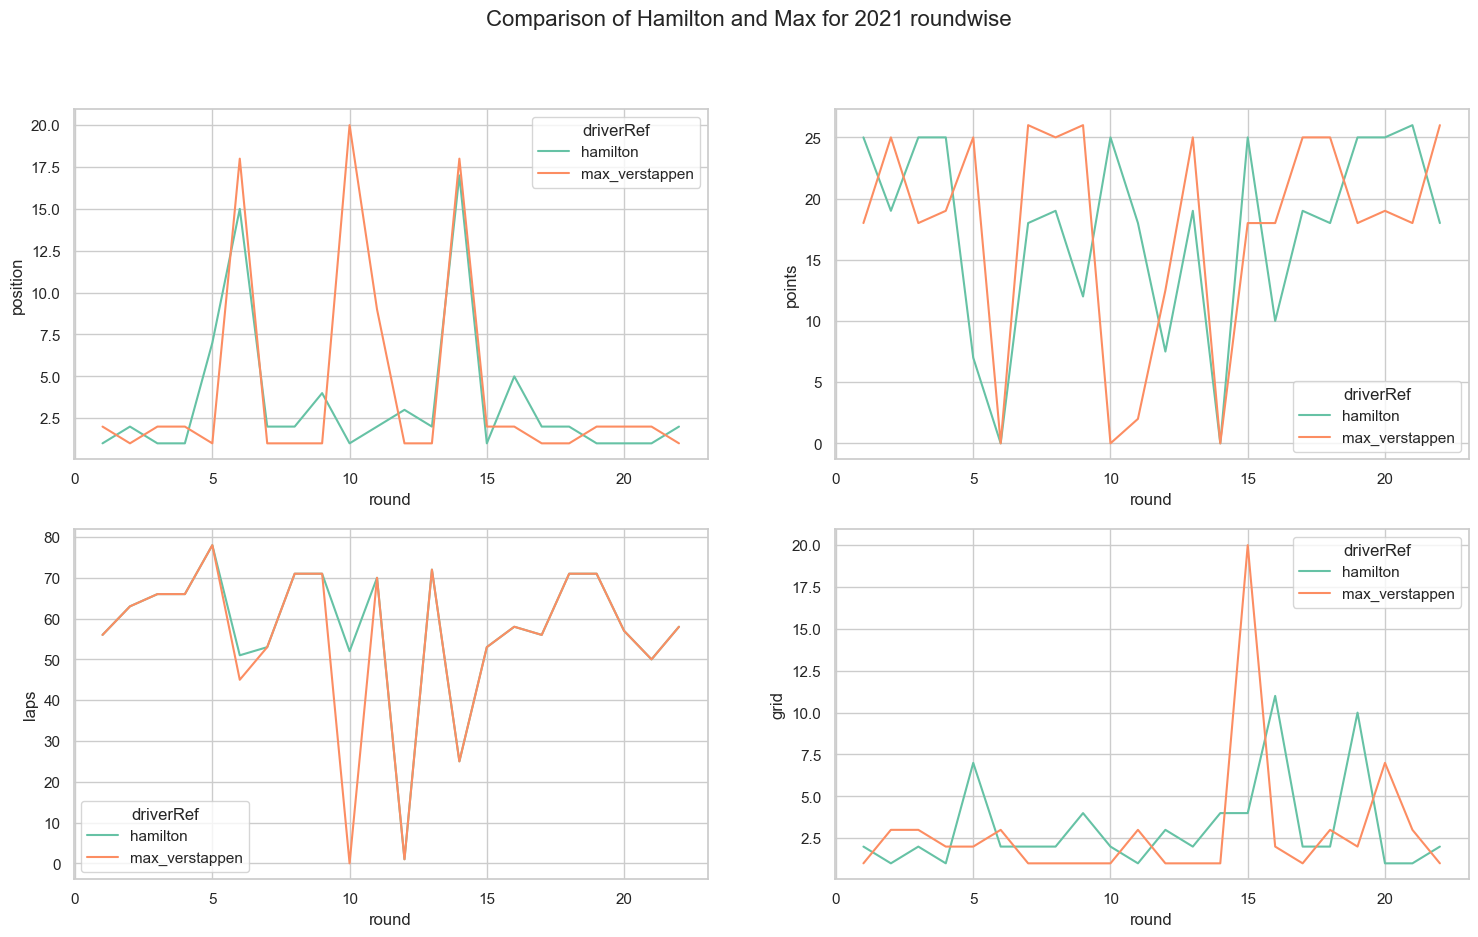

In [92]:
fig, ax = plt.subplots(nrows=2, ncols=2 ,figsize = (18, 10))
sns.lineplot(x = 'round', y = 'position', hue = 'driverRef', data = df7, ax=ax[0,0])
sns.lineplot(x = 'round', y = 'points', hue = 'driverRef', data = df8, ax=ax[0,1])
sns.lineplot(x = 'round', y = 'laps', hue = 'driverRef', data = df9, ax=ax[1,0])
sns.lineplot(x = 'round', y = 'grid', hue = 'driverRef', data = df10, ax=ax[1,1])
plt.suptitle('Comparison of Hamilton and Max for 2021 roundwise', fontsize=16)

Hamilton and Max waere pretty consistent in terms of win results and grid positions with a few exceptions.

### Drivers with Highest Win % and Pole wins

In [110]:
df['pole_win'] = np.where((df['position'] == 1.0) & (df['grid'] == 1.0), 1, 0)
df11 = df['driverRef'][df['pole_win'] == 1]

In [154]:
df12 = pd.merge(df.groupby('driverRef', as_index=False)['round'].count(), df.groupby('driverRef', as_index=False)['win_history'].max(), on='driverRef')
df12['win_percentage'] = df12['win_history']/df12['round']*100
df12.sort_values(by = 'win_percentage', axis=0, ascending=False, inplace=True)

Text(0.5, 1.0, 'Top 20 Drivers with Most Pole Wins')

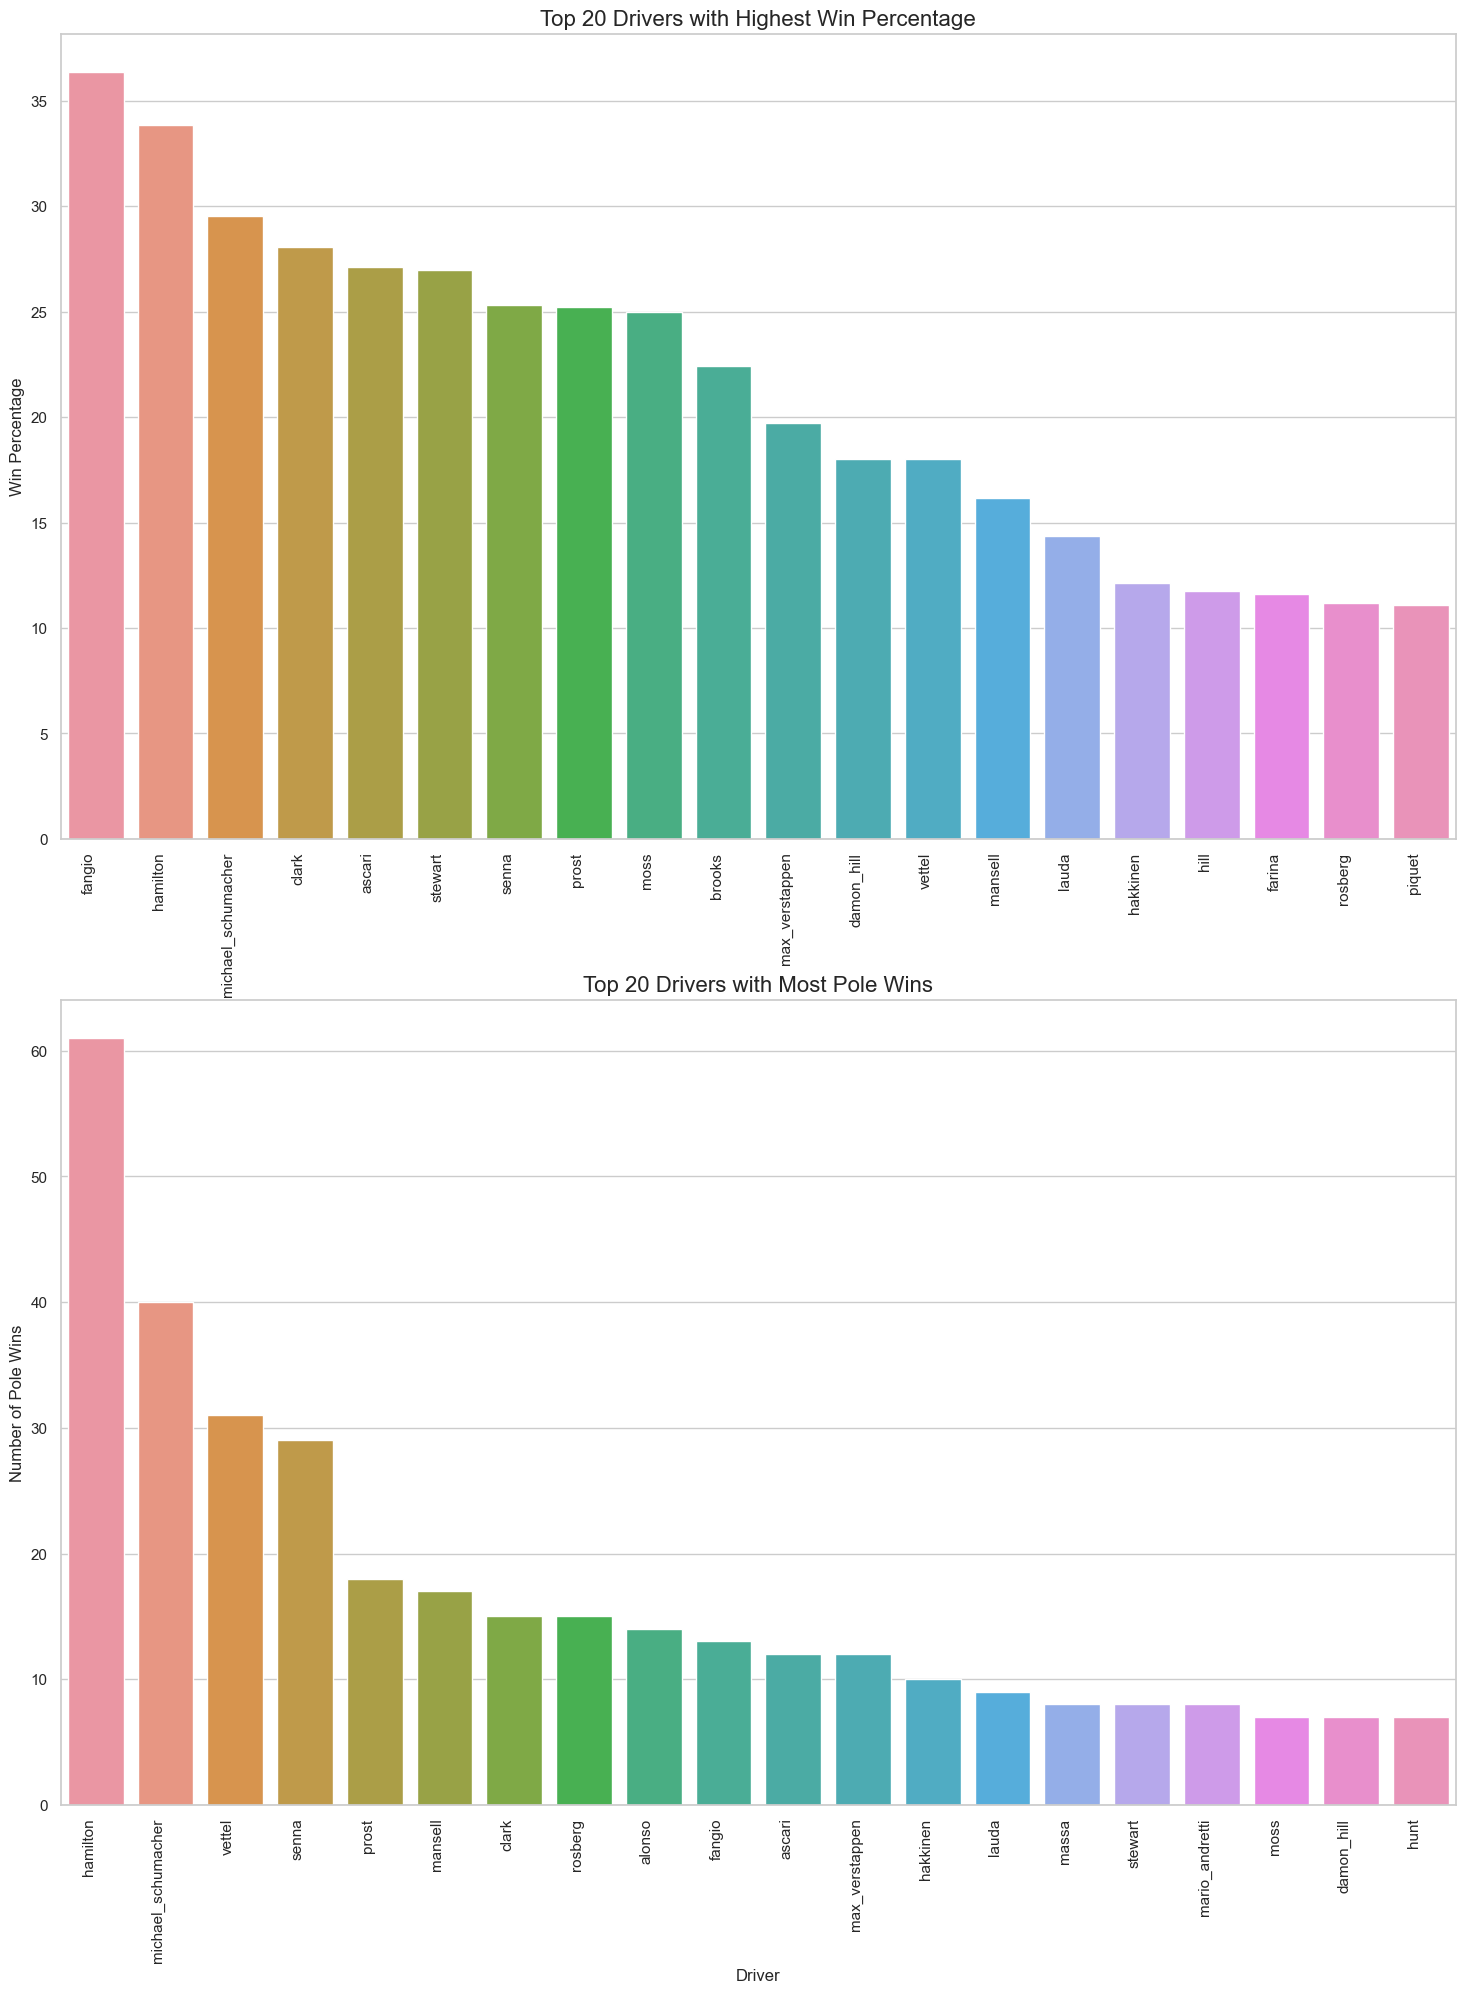

In [177]:
fig, ax = plt.subplots(nrows=2, ncols=1 ,figsize = (18, 23))
sns.barplot(x = df12[df12['round']>50].head(20)['driverRef'], y = df12[df12['round']>50].head(20)['win_percentage'], ax=ax[0])
sns.barplot(x = df11.value_counts().index[:20], y = df11.value_counts().values[:20], ax=ax[1])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90, horizontalalignment='right')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, horizontalalignment='right')
ax[0].set_xlabel('Driver')
ax[0].set_ylabel('Win Percentage')
ax[0].set_title('Top 20 Drivers with Highest Win Percentage', fontsize=16)
ax[1].set_xlabel('Driver')
ax[1].set_ylabel('Number of Pole Wins')
ax[1].set_title('Top 20 Drivers with Most Pole Wins', fontsize=16)

### Distribution of Labels

Text(0.5, 0.98, 'Distribution of Labels')

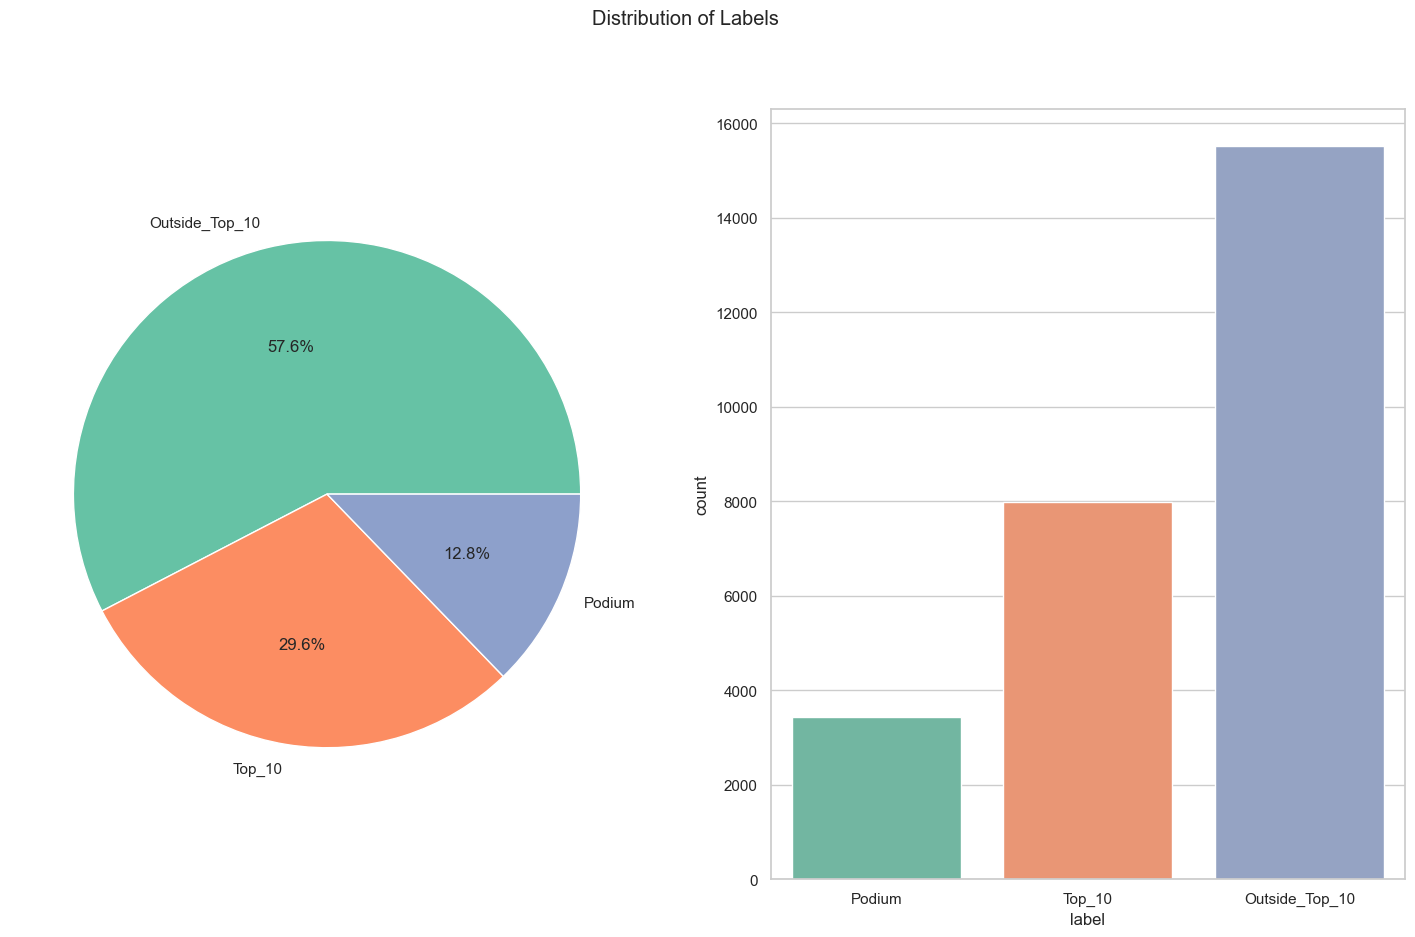

In [181]:
fig, ax = plt.subplots(nrows=1, ncols=2 ,figsize = (18, 10))
ax[0].pie(df['label'].value_counts(), labels = df['label'].value_counts().index, autopct='%1.1f%%')
sns.countplot(x = 'label', data = df, ax=ax[1])
plt.suptitle('Distribution of Labels')

### Pairplot

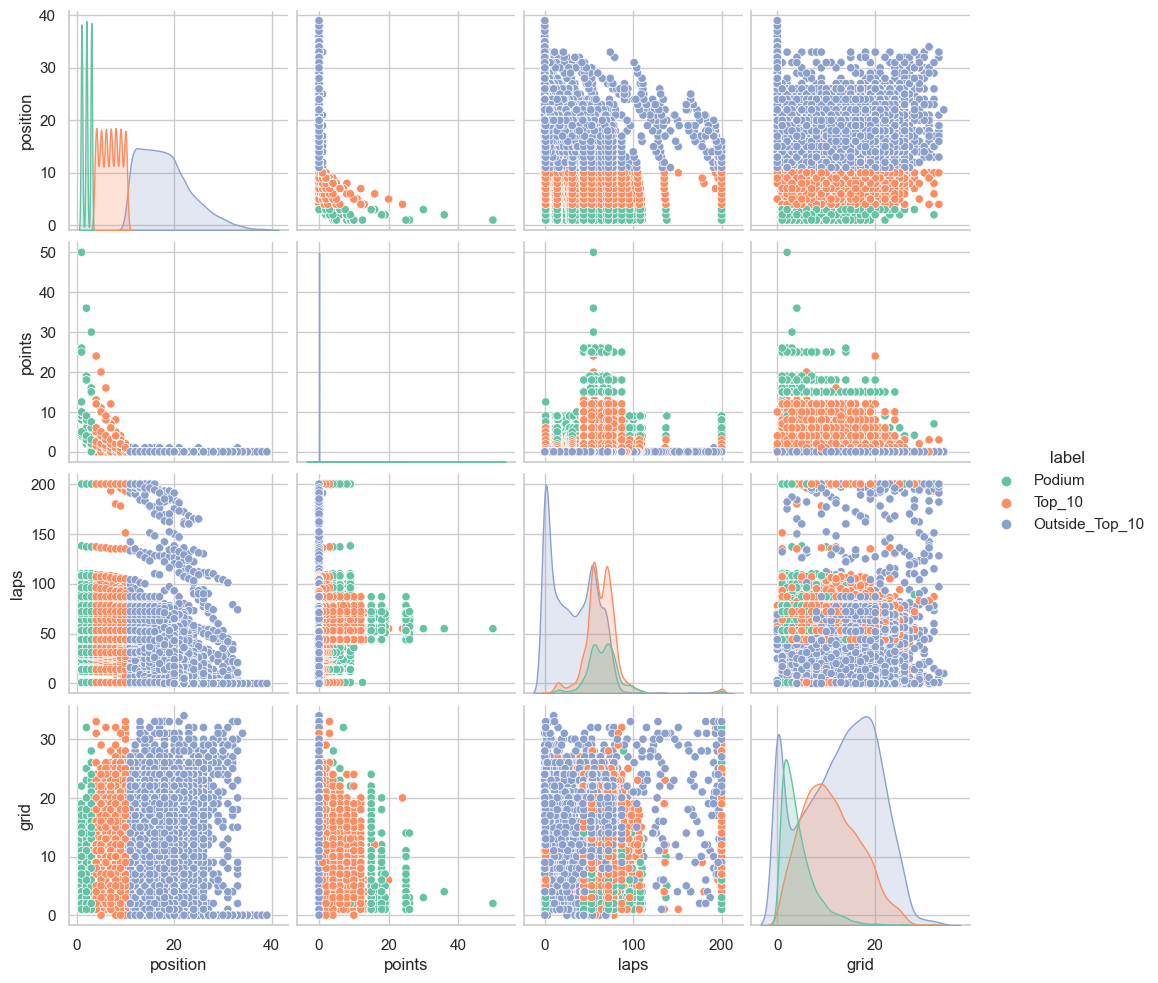

In [183]:
sns.pairplot(df[['position', 'points', 'laps', 'grid', 'label']], hue='label')

## Twitter Data

### Pie charts to compare Sentiments of tweets written by fans of different teams

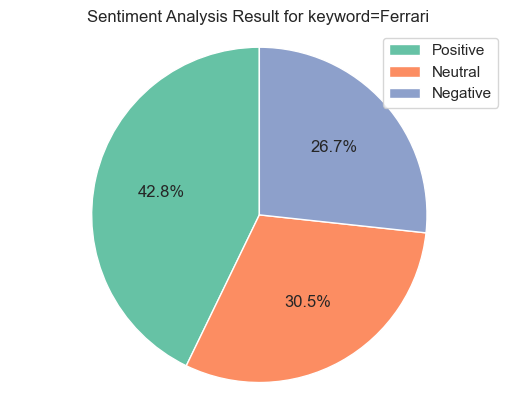

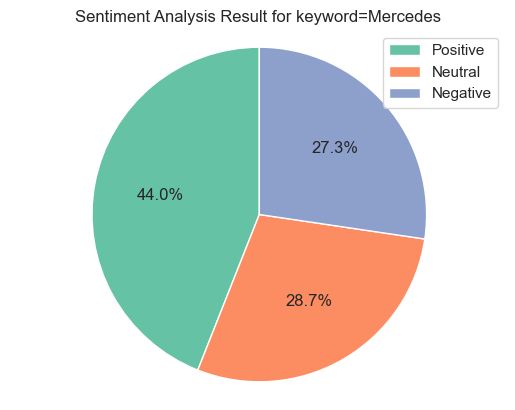

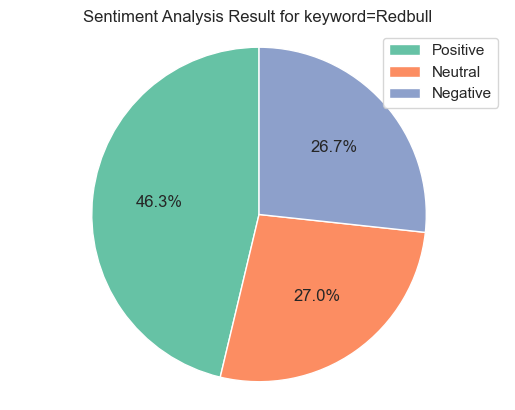

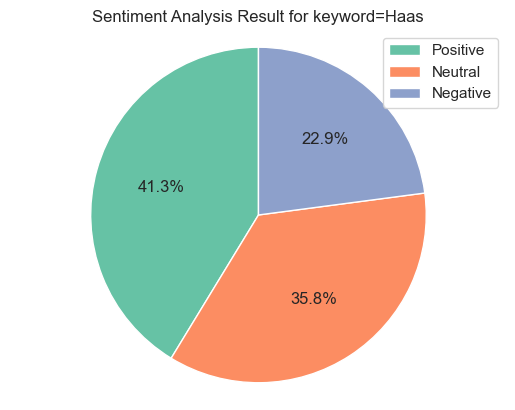

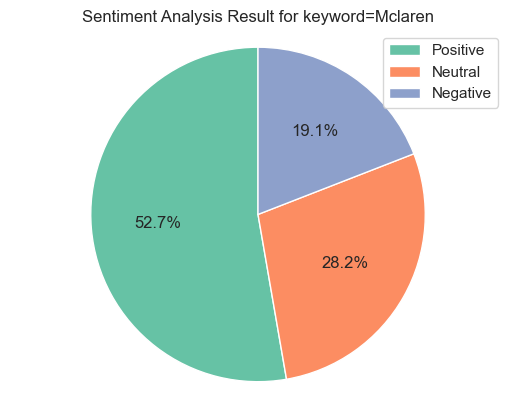

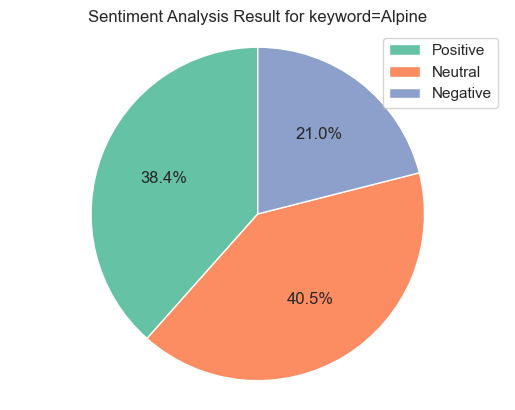

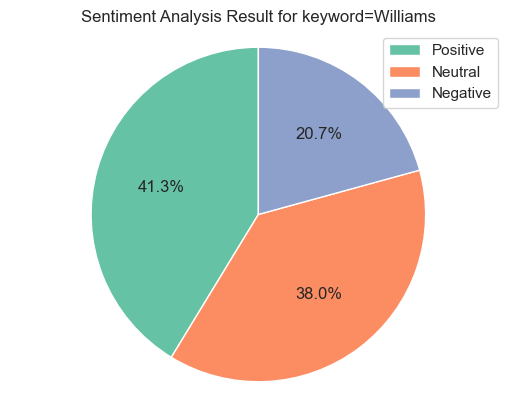

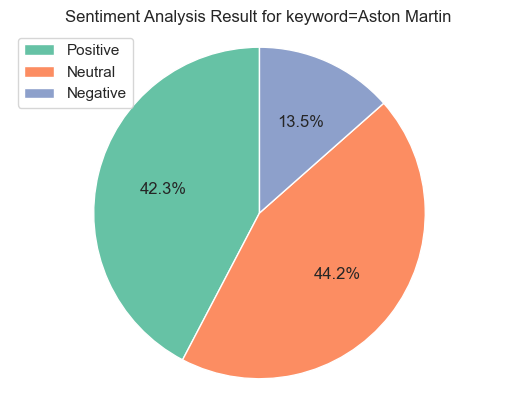

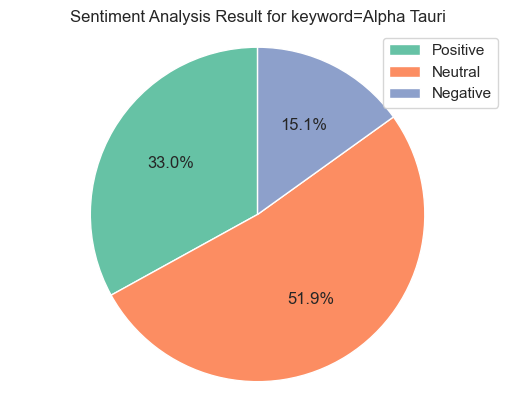

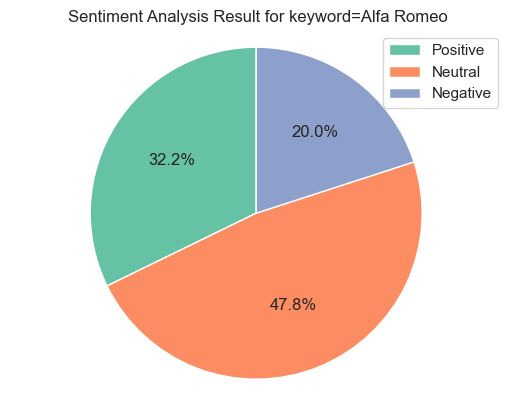

In [194]:
teams = ['Ferrari', 'Mercedes', 'Redbull', 'Haas', 'Mclaren', 'Alpine', 'Williams', 'Aston Martin', 'Alpha Tauri', 'Alfa Romeo']

for team in teams:
    
    indiv_df = grouped_df[grouped_df['Team'] == team]
    indiv_df = indiv_df.rename(columns = {'0': 'Count'})
    #indiv_df = indiv_df.pivot(index = 'Team', columns = 'sentiment', values = 'Count')
    #display(indiv_df)
    
    positive_percentage = (indiv_df[indiv_df['sentiment'] == 'positive']['Count'].values[0] / indiv_df['Count'].sum()) * 100
    negative_percentage = (indiv_df[indiv_df['sentiment'] == 'negative']['Count'].values[0] / indiv_df['Count'].sum()) * 100
    neutral_percentage = (indiv_df[indiv_df['sentiment'] == 'neutral']['Count'].values[0] / indiv_df['Count'].sum()) * 100
    
    positive = indiv_df[indiv_df['sentiment'] == 'positive']['Count'].values[0]
    negative = indiv_df[indiv_df['sentiment'] == 'negative']['Count'].values[0]
    neutral = indiv_df[indiv_df['sentiment'] == 'neutral']['Count'].values[0]
    
    labels = ["Positive", "Neutral","Negative"]
    sizes = [positive, neutral, negative]
    plt.pie(sizes, startangle=90, autopct='%1.1f%%')
    plt.legend(labels)
    plt.title("Sentiment Analysis Result for keyword=" + team)
    plt.axis('equal')
    plt.savefig('../../501-project-website/images/visualizations/sentiment_analysis/' + team + '_pie.png')
    plt.show()

### Worldcloud to check the most used words in tweets for each team

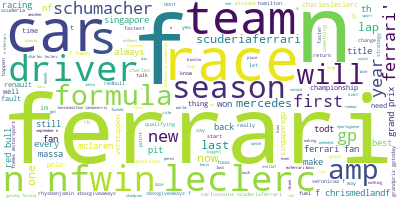

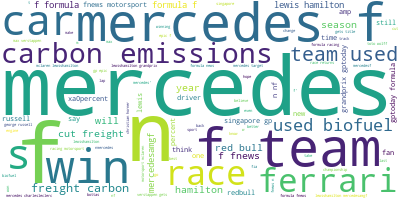

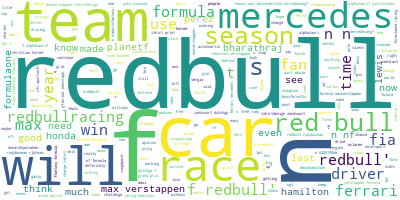

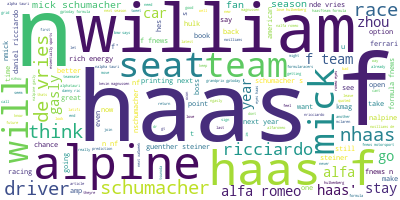

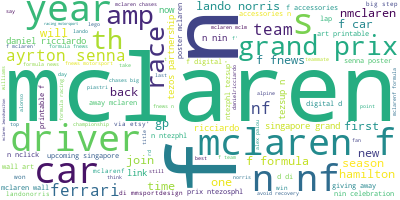

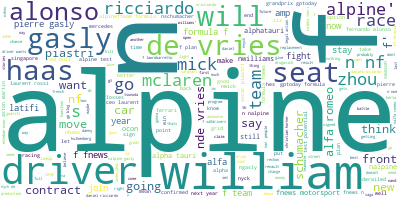

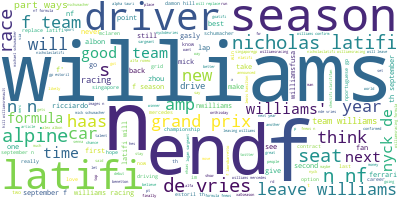

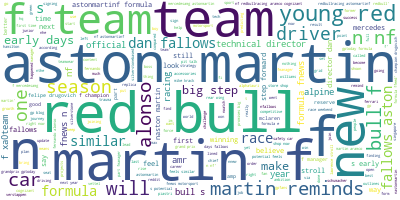

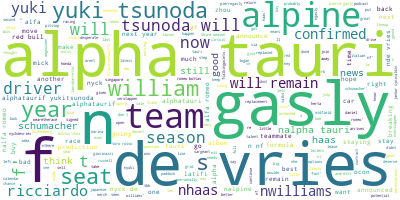

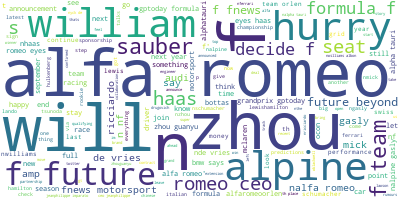

In [197]:
def create_wordcloud(text):
    #mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                    max_words=3000,
                    stopwords=stopwords,
                    repeat=True)
    wc.generate(str(text))
    wc.to_file("../../501-project-website/images/visualizations/sentiment_analysis/" + team + "_wordcloud.png")
    path="../../501-project-website/images/visualizations/sentiment_analysis/" + team + "_wordcloud.png"
    display(Image.open(path))
    
for team in teams:
    
    indiv_df = all_sentiment_df[all_sentiment_df['Team'] == team]
    create_wordcloud(indiv_df["text"].values)

### Scatter plot to Compare Polarity and Subjectivity distributions Sentiment-wise

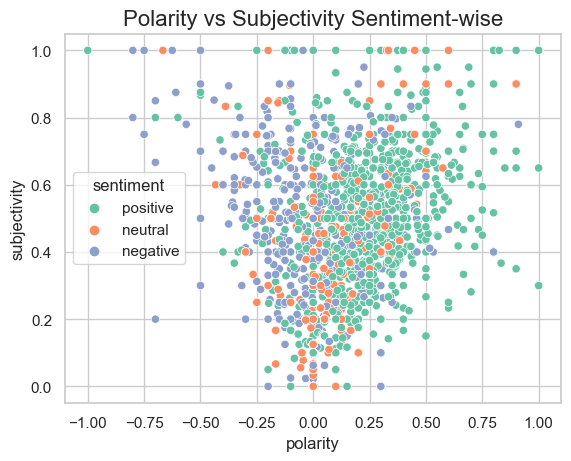

In [206]:
sns.scatterplot(data = all_sentiment_df, x = 'polarity', y = 'subjectivity', hue = 'sentiment')
plt.title('Polarity vs Subjectivity Sentiment-wise', fontsize=16)
#plt.savefig('../../501-project-website/images/visualizations/sentiment_analysis/scatterplot_polarity_vs_subjectivity.png')
plt.show()

### Polarity and Subjectivity Values between Teams

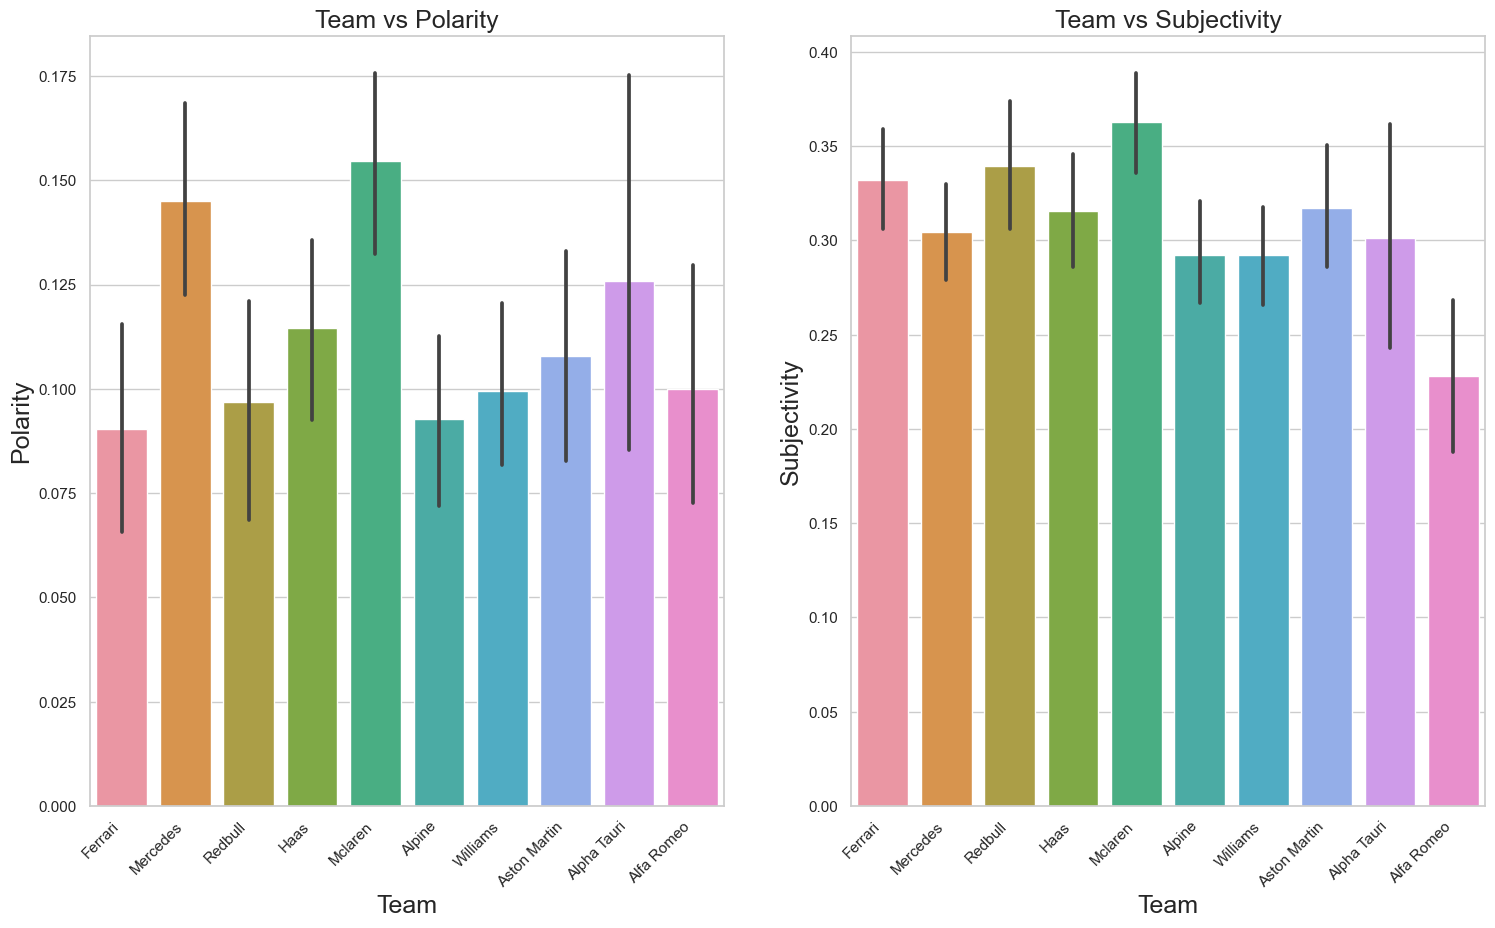

In [201]:
fig, ax = plt.subplots(nrows=1, ncols=2 ,figsize = (18, 10))

sns.barplot(x = 'Team', y = 'polarity', data = all_sentiment_df, ax = ax[0])
sns.barplot(x = 'Team', y = 'subjectivity', data = all_sentiment_df, ax = ax[1])

FS = 18
ax[0].set_title('Team vs Polarity', fontsize = FS)
ax[1].set_title('Team vs Subjectivity', fontsize = FS)
ax[0].set_xlabel('Team', fontsize = FS)
ax[0].set_ylabel('Polarity', fontsize = FS)
ax[1].set_xlabel('Team', fontsize = FS)
ax[1].set_ylabel('Subjectivity', fontsize = FS)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment='right')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, horizontalalignment='right')

#plt.savefig('../../501-project-website/images/visualizations/sentiment_analysis/Team_vs_Polarity_Subjectivity.png')
plt.show()